# Regression with Python

### Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.
For this competition, you are predicting the sale price of bulldozers sold at auctions.

The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
The key fields are in train.csv are:

SalesID: the uniue identifier of the sale
MachineID: the unique identifier of a machine.  A machine can be sold multiple times
saleprice: what the machine sold for at auction (only provided in train.csv)
saledate: the date of the sale
There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df= pd.read_csv('TrainAndValid.csv',parse_dates=['saledate'],low_memory=False)

It is showing sale date as an object so we need to c hange it to date type

If file size is big use low_memory

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Count null entry

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesID,412698.0,2.011161e+06,1.080068e+06,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,3.121518e+04,2.314174e+04,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,1.230061e+06,4.539533e+05,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,6.947202e+03,6.280825e+03,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,1.351694e+02,9.646749e+00,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,6.585268e+00,1.715841e+01,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,1.899050e+03,2.921902e+02,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,3.522988e+03,2.716993e+04,0.0,0.00,0.0,3209.00,2483300.0


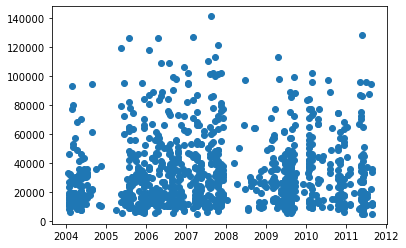

In [7]:
plt.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

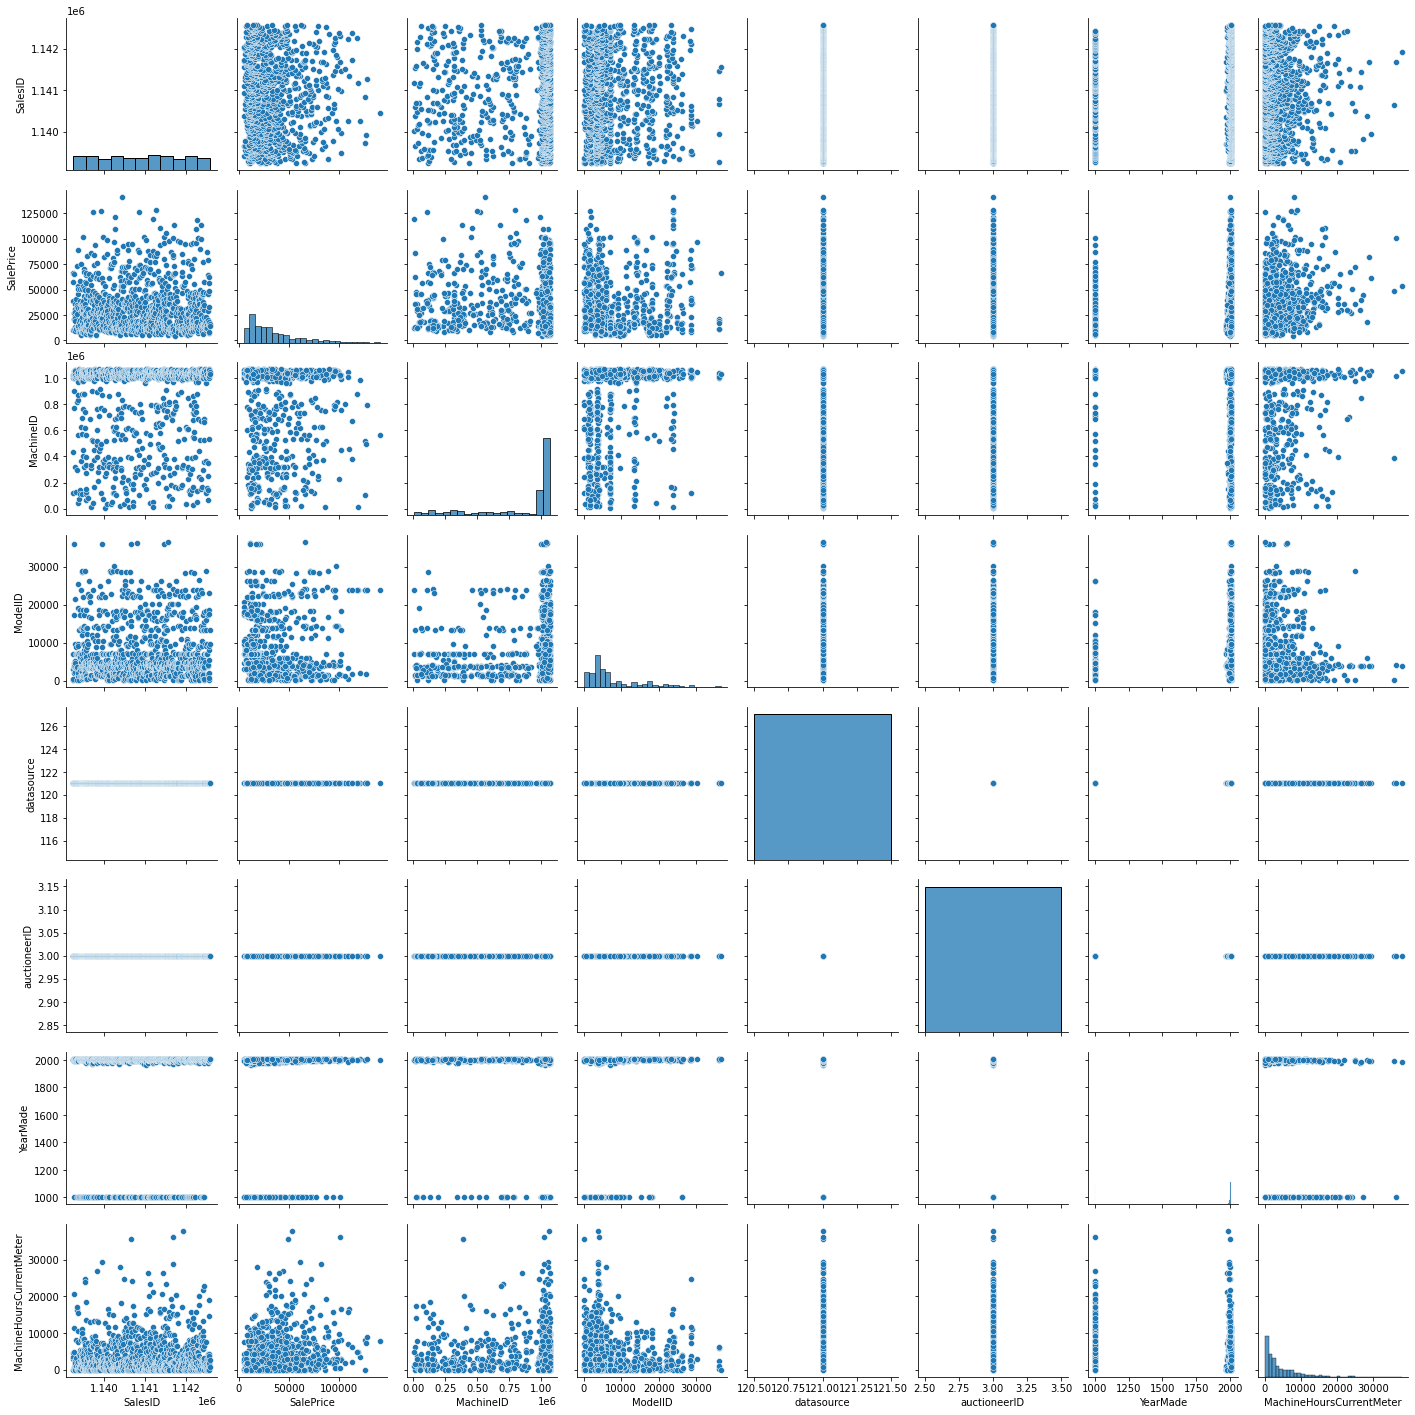

In [8]:
sns.pairplot(df[:1000])

When we are training a model using a data set Value of training and Validation should not overlap

In [9]:
df.sort_values(by=['saledate'],inplace=True)

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [11]:
dfNew= df.copy()

In [12]:
dfNew.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
dfNew['year']=dfNew.saledate.dt.year

In [14]:
dfNew['month']=dfNew.saledate.dt.month

In [15]:
dfNew['date']=dfNew.saledate.dt.day

In [16]:
dfNew['Dayof year']=df.saledate.dt.dayofyear

In [17]:
dfNew.drop('saledate',axis=1,inplace=True)

In [18]:
dfNew.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,date,Dayof year
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,31


We cant use categorical encoding cause there are lot of catecory

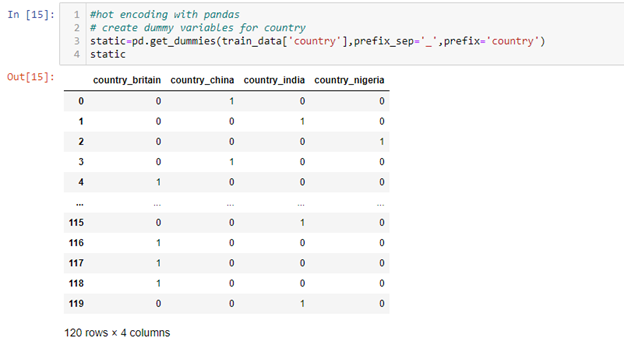

In [19]:
numeric = []
for label,content in dfNew.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'year',
 'month',
 'date',
 'Dayof year']

In [20]:
#Imputing numeric data
for label,content in dfNew.items():
    if pd.api.types.is_numeric_dtype(content):
        dfNew[label].fillna(dfNew[label].mean(),inplace=True)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

We will go for integer encoding

In [21]:
#Find the number of non-numeric columns 
not_numeric=[]
for label,content in dfNew.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
print(len(not_numeric))

44


In [23]:
#Number of Non-numeric features having Nan values
missing = []
for label,content in dfNew.items():
    if not pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            missing.append(label)
len(missing)

38

In [25]:
dfNew["UsageBand"].mode()

0    Medium
dtype: object

In [26]:
#Imputing non-numeric data
for label,content in dfNew.items():
    if not pd.api.types.is_numeric_dtype(content):
        if dfNew[label].isna().sum():
            dfNew[label].fillna(dfNew[label].mode()[0],inplace=True)

In [27]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           412698 non-null  object 
 12  fiModelSeries             412698 non-null  object 
 13  fiModelDescriptor         412698 non-nu

In [28]:
for label,content in dfNew.items():
    if pd.api.types.is_string_dtype(content):
        #print(label)
        dfNew[label] = content.astype('category').cat.codes

In [29]:
dfNew.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,date,Dayof year
205615,1646770,9500.0,1126363,8434,132,18.0,1974,3522.988285,2,4592,...,0,0,7,5,3,1,1989,1,17,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,3522.988285,2,1819,...,0,0,5,5,3,1,1989,1,31,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,3522.988285,2,2347,...,0,0,7,5,3,1,1989,1,31,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,3522.988285,2,1818,...,0,0,5,5,3,1,1989,1,31,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,3522.988285,2,2118,...,0,0,5,4,3,1,1989,1,31,31


To check how the numeric values are alloted 

In [31]:
print(df.Steering_Controls.unique())
dfNew.Steering_Controls.unique()

[nan 'Conventional' 'Four Wheel Standard' 'Wheel' 'No' 'Command Control']


array([1, 2, 4, 3, 0], dtype=int8)

## Training the model

In [76]:
train_set = dfNew[ dfNew['year']!= 2011]
valid_set = dfNew[ dfNew['year']== 2012]

In [77]:
train_set.shape

(377501, 56)

In [78]:
valid_set.shape

(11573, 56)

In [79]:
X_train = train_set.drop('SalePrice',axis=1)
y_train = train_set['SalePrice']

In [80]:
X_valid = valid_set.drop('SalePrice',axis=1)
y_valid = valid_set['SalePrice']

## Random Forest Regressor

Try to minimize the varience when we are working with regression in Random forest and Decision tree

As the varience is less values are closer to each other

In [81]:
from sklearn.ensemble import RandomForestRegressor

We will shuffel data and select every time we make partition

In [82]:
from sklearn.model_selection import RepeatedKFold

In [83]:
M1= RandomForestRegressor()
cv = RepeatedKFold (n_splits=3, n_repeats=2)

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
from sklearn.metrics import mean_squared_log_error

In [86]:

def rmsle(model, X ,Y):
    y_pred = model.predict(X)
    return np.sqrt(mean_squared_log_error(Y,y_pred))


In [88]:
n_score = cross_val_score (M1, X_train.iloc[:20000] , y_train.iloc[:20000] , cv=cv, scoring= rmsle)

print("Mean :", np.mean(n_score))
print("Std:", np.std(n_score))

Mean : 0.2282000379922585
Std: 0.0019397275318033156
